In [1]:
# Google ドライブをマウントするには、このセルを実行
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, add, GlobalAveragePooling2D

from keras.optimizers import Adam

from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import numpy as np
#from keras.datasets import cifar10
from keras.utils import np_utils

import matplotlib.pyplot as plt
!pip install scipy==1.2
from scipy.misc import toimage
from keras.preprocessing import image
from PIL import Image
import os

Using TensorFlow backend.


     |████████████████████████████████| 26.6MB 36.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
#!pip install -U -q PyDrive
#!pip install google

#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
#
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [0]:
#!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
#!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
#!apt-get update -qq 2>&1 > /dev/null
#!apt-get -y install -qq google-drive-ocamlfuse fuse
#from google.colab import auth
#auth.authenticate_user()
#from oauth2client.client import GoogleCredentials
#creds = GoogleCredentials.get_application_default()
#import getpass
#!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
#vcode = getpass.getpass()
#!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
#4/cAHSejjkLAto6KmPPXOESCRHhRKVy5cVnkyWTgdG9rV9LsC5x1Kazgs

E: Package 'python-software-properties' has no installation candidate
··········


In [0]:
#import getpass
#!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
#vcode = getpass.getpass()
#!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

··········
/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
#4/cAFMNWjCs5MUb10ZAErrbadO_p4-Fl0xqGlPOtiCf32kgsCoyKmQBEE
#BGのディレクトリ
#https://drive.google.com/open?id=1wfNh7CkRJ4bxNxiGKD_Yj70CfN3qX6Kh
#単独の写真
#https://drive.google.com/open?id=17Rexex4QDf1aMKKMNuk7qmwlQ3XKl7ZZ

#id = '17Rexex4QDf1aMKKMNuk7qmwlQ3XKl7ZZ'
#downloaded = drive.CreateFile({'id': id})
#downloaded.GetContentFile('103_57774.432245-57774.435081.jpg')

In [0]:
#!ls /content/drive/My\ Drive/Colab\ Notebooks/flare/
img_path = '/content/drive/My Drive/Colab Notebooks/img/'
#bg_path = '/content/drive/My\ Drive/Colab\ Notebooks/background/'
#flare_image = img_path.load_img()

img_list = []
img_label = []

#print(img_list)
#print(img_label)

for dir in os.listdir(img_path):
  if dir == ".DS_Store":
    continue
    
  dir1 = img_path + dir 
  label = 0
    
  if dir == "background":
      label = 0
  elif dir == "flare":
      label = 1

  for file in os.listdir(dir1):
    if file != ".DS_Store":
      # 配列label_listに正解ラベルを追加
      #print(os.listdir(dir1))
      img_label.append(label)
      filepath = dir1 + "/" + file
      # 画像を64x64pixelに変換し、グレースケール配列の64x64の２次元配列として読み込む。
      img = np.array(Image.open(filepath).convert('L').resize((32, 32)))
      # 出来上がった配列をimage_listに追加。
      img_list.append(img / 255.)
      #print(img)
      # kerasに渡すためにnumpy配列に変換。

img_list = np.array(img_list)
img_list = img_list.reshape(-1,32,32,1)

# ラベルの配列を1と0からなるラベル配列に変更
n_classes = 2
Y = np_utils.to_categorical(img_label, n_classes)

#print(img_list.shape,Y.shape)

In [0]:
#訓練データと検証データに分ける
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = model_selection.train_test_split(img_list, img_label, train_size=0.8)
(X_train, X_test, y_train, y_test) = train_test_split(img_list, Y, train_size=0.9, random_state=0)

In [0]:
# floatに変換しておく
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')

# 正規化
#X_train /= 255.0
#X_test /= 255.0

In [32]:
#
# ResNet のモデルを定義するセル
#

# inputs と residual 2つの処理結果を受け取って、両者を足す
def _shortcut(inputs, residual):
  
  # residual のほうのフィルタ数を取得する
  # ちなみに
  # _keras_shape[1] 画像の幅
  # _keras_shape[2] 画像の高さ
  # _keras_shape[3] チャンネル数
  # になっている(デフォルトでは)。
  # 本当はチャンネル数、幅、高さの順番のこともあるので
  # それを考慮したコードにしなければならないのだが、今回はこれで問題ない
  n_filters = residual._keras_shape[3]
  
  # inputs と residual とでチャネル数が違うかもしれない。
  # そのままだと足せないので、1x1 conv を使って residual 側のフィルタ数に合わせている
  shortcut = Convolution2D(n_filters, (1,1), strides=(1,1), padding='valid')(inputs)
  
  # 2つを足す
  return add([shortcut, residual])


# ResBlock を定義
# ここでの処理は BatchNorm → ReLU → Conv とシンプルなものにしてあるが、
# ここを色々変更する改良案が無数にある
def _resblock(n_filters, strides=(1,1)):
  def f(input):    
    x = Convolution2D(n_filters, (3,3), strides=strides,
                                      kernel_initializer='he_normal', padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(n_filters, (3,3), strides=strides,
                                      kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    
    # 入力そのものと、BN→ReLU→Conv したものとを足す
    # この部分がResNetのもっとも重要な点
    return _shortcut(input, x)
    
  return f


def resnet():
  # 入力テンソルを定義しておく
  inputs = Input(shape=(32, 32, 1))
  
  # ResBlock で処理をする前に、いったん
  # 7x7で畳み込み→BN→ReLU　をし、さらに MaxPooling している
  # これは無くても動くが、早い段階でとりあえずMaxPoolingすることで画像サイズが1/2になるので
  # パラメータ数の増加を抑える(高速に学習できる)効果がある
  
  # 7x7conv→BN→ReLU
  x = Convolution2D(32, (5,5), strides=(1,1),
                    kernel_initializer='he_normal', padding='same')(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  
  # MaxPoolingで縮小
  x = MaxPooling2D((3, 3), strides=(2,2), padding='same')(x)
  
  #ここからは ResBlock を積み重ねていく
  # 下では ResBlock x3 → MaxPooling → ResBlock x3 という非常に小さいネットワーク
  
  x = _resblock(n_filters=32)(x)
  x = _resblock(n_filters=32)(x)
  x = _resblock(n_filters=32)(x)
  x = MaxPooling2D(strides=(2,2))(x)  
  x = _resblock(n_filters=64)(x)
  x = _resblock(n_filters=64)(x)
  x = _resblock(n_filters=64)(x)

  # Global Average Pooling したあとに Fully Connection Network ( = Dense) する
  #Denseの最初の数はカテゴリー数
  x = GlobalAveragePooling2D()(x)
  x = Dense(2, kernel_initializer='he_normal', activation='sigmoid')(x)
  
  # Keras では、入力と出力の2個だけを指定すると、計算に必要なネットワークを勝手に構築してくれる機能がある
  # inputs は初めに定義しておいた  Input(shape=(32, 32, 3)) で、
  # outputs は softmax で10個の出力を行う Dense のネットワークなので、その2つを指定する
  model = Model(inputs=inputs, outputs=x)
  return model

model = resnet()

# optimizer として Adam を指定する。SGDでも良いがAdamのほうが収束が早い
adam = Adam()

# inputs から outputs を求める計算をするようにコンパイルする
# ここでネットワークでどのような処理を行うかが全て決定される
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# 今作ったネットワークがどんなネットワークなのか概要を表示する機能(見られるだけなので無くても良い)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 32, 32, 32)   832         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 32, 32, 32)   128         conv2d_20[0][0]                  
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 32, 32, 32)   0           batch_normalization_14[0][0]     
__________________________________________________________________________________________________
max_poolin

In [38]:
# 1 epoch ごとに　weights.01.hdf5, weights.02.hdf5 … のようにモデルを保存してくれる
callback_cp = ModelCheckpoint(filepath='weights.{epoch:02d}.hdf5')

# 1 epoch ごとに val_acc　に変化があるか調べて、殆ど変わってなかったら学習を打ち切る
callback_es = EarlyStopping(monitor='val_acc', patience=2, mode='auto', verbose=1)

batch_size = 50
epochs = 30

# 学習する
#h = model.fit(X_train, y_train,
#              batch_size=batch_size,
#              epochs=epochs,
#              validation_split=0.2,
#              callbacks=[callback_cp, callback_es])

h = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.2)

# 学習が終わった最終状態を保存する
model.save('model.hdf5')

Train on 4320 samples, validate on 1080 samples
Epoch 1/30
4320/4320 [==============================] - 3s 750us/step - loss: 0.0072 - acc: 0.9984 - val_loss: 0.0826 - val_acc: 0.9759
Epoch 2/30
4320/4320 [==============================] - 3s 764us/step - loss: 0.0071 - acc: 0.9972 - val_loss: 0.0139 - val_acc: 0.9963
Epoch 3/30
4320/4320 [==============================] - 3s 760us/step - loss: 0.0031 - acc: 0.9995 - val_loss: 0.0178 - val_acc: 0.9935
Epoch 4/30
4320/4320 [==============================] - 3s 766us/step - loss: 0.0064 - acc: 0.9981 - val_loss: 0.0486 - val_acc: 0.9889
Epoch 5/30
4320/4320 [==============================] - 3s 765us/step - loss: 0.0116 - acc: 0.9965 - val_loss: 0.0808 - val_acc: 0.9759
Epoch 6/30
4320/4320 [==============================] - 3s 767us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0189 - val_acc: 0.9954
Epoch 7/30
4320/4320 [==============================] - 3s 764us/step - loss: 3.6448e-04 - acc: 1.0000 - val_loss: 0.0294 - val_acc: 0.9

In [0]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(len(h.history['acc']))

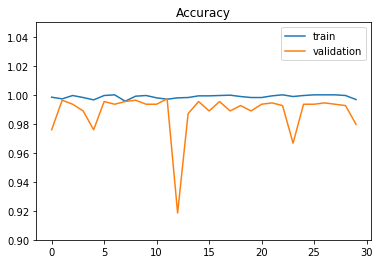

In [44]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(len(h.history['acc']))

# accuracy と validation accuracy の推移をプロットする
plt.title('Accuracy')
plt.ylim(0.9, 1.05)
plt.plot(epoch, h.history['acc'], label='train')
plt.plot(epoch, h.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [0]:
##loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model=load_model('/content/model.hdf5')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


0.9984187


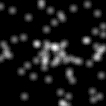

In [46]:
from keras.preprocessing.image import img_to_array, load_img
from IPython.display import Image,display_jpeg


#画像の読込
img_path = ('/content/drive/My Drive/Colab Notebooks/103_57774.432245-57774.435081.jpg')
img = img_to_array(load_img(img_path, target_size=(32,32)))

# 画像を64x64pixelに変換し、グレースケール配列の64x64の２次元配列として読み込む。
img = img_to_array(load_img('/content/drive/My Drive/Colab Notebooks/103_57774.432245-57774.435081.jpg', grayscale=True, target_size=(32,32,1)))

# 出来上がった配列をimage_listに追加。
#0-1に変換
img_nad = img_to_array(img) / 255.
img_nad = img_nad.reshape(-1,32,32,1)

pred = model.predict(img_nad)
#print(pred)

score = np.max(pred)
print(score)

#from IPython.display import Image,display_jpeg
#display_jpeg(Image('103_57774.432245-57774.435081.jpg'))
display_jpeg(Image(img_path))

In [14]:
model.predict(content/drive/My\ Drive/Colab\ Notebooks/103_57774.432245-57774.435081.jpg)

SyntaxError: ignored

In [0]:
#def load_data():
#    train_dir = '/home/tsato/work/machine_learning/CNN/images/4orbit/train/'
#    test_dir = '/home/tsato/work/machine_learning/CNN/images/4orbit/test/'
#    train_image_list = []
#    train_label_list = []
#    test_image_list = []
#    test_label_list = []

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adagrad
from keras.optimizers import Adam
from PIL import Image
import os

# 学習用のデータを作る.
image_list = []
label_list = []

img_path = '/content/drive/My\ Drive/Colab\ Notebooks/flare/*'
#flare_image = image.load_img(img_path)
for dir in os.listdir("data/train"):
    if dir == ".DS_Store":
        continue

    dir1 = "data/train/" + dir 
    label = 0

    if dir == "apple":    # appleはラベル0
        label = 0
    elif dir == "orange": # orangeはラベル1
        label = 1



#!ls /content/drive/My\ Drive/Colab\ Notebooks/flare/
#img_path = '/content/drive/My\ Drive/Colab\ Notebooks/flare/*'
#flare_image = image.load_img(img_path)


FileNotFoundError: ignored